# Getting started with SparkML pipelines

## Preprocessing data

In [2]:
df = spark.createDataFrame([(1,2,3),(3,4,5)], schema=['c1','c2','c3'])
display(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 10, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f2a7f601-b487-4339-b41f-c277731178d7)

### VectorAssembler as Transformer

In [3]:
from pyspark.ml.feature import VectorAssembler
v1 = VectorAssembler(inputCols=['c1','c2','c3'],outputCol='features')
display(v1.transform(df))

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 11, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, d3d15fa2-d2d8-46a0-935a-de235409c59c)

In [4]:
df = spark.createDataFrame([('F',2,3),('M',4,5)], schema=['sex','O2sat','N%'])
display(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 12, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, cb6ece41-e8cc-4707-815d-71bd7d2e1116)

In [5]:
v1 = VectorAssembler(inputCols=['sex','O2sat','N%'],outputCol='features', handleInvalid='error')
display(v1.transform(df))

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 13, Finished, Available, Finished)

IllegalArgumentException: Data type string of column sex is not supported.

### Transformers

In [6]:
from pyspark.ml.feature import StringIndexer
s1 = StringIndexer(inputCol='sex',outputCol='sexind')

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 14, Finished, Available, Finished)

In [7]:
s1.transform(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 15, Finished, Available, Finished)

AttributeError: 'StringIndexer' object has no attribute 'transform'

In [8]:
sfitted = s1.fit(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 16, Finished, Available, Finished)

In [9]:
sfittedtransformed = sfitted.transform(df)
display(sfittedtransformed)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 17, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 6161e34c-01e8-46b0-93da-2c80bbe9a9e0)

In [10]:
v2 = VectorAssembler(inputCols=['sexind','O2sat','N%'])
display(v2.transform(sfittedtransformed))

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 18, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 3a66656e-dcc7-4975-b85a-f75a255a2b2b)

## Make it easier on yourself: pipelines

In [11]:
from pyspark.ml.pipeline import Pipeline
p1 = Pipeline(stages=[s1,v2])
display(p1.fit(df).transform(df))

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 2ab0473f-36b7-46e4-af3f-25478838369d)

### Pipeline parameters

In [12]:
p1.getStages()

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 20, Finished, Available, Finished)

[StringIndexer_2fd171e92b1b, VectorAssembler_98620bc6b0b3]

In [13]:
print("\nParameters from all stages:")
for stage in p1.getStages():
    print(f"\n{stage.__class__.__name__}:")
    for param in stage.params:
        print(f"{param.name}: {param.doc}")

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 21, Finished, Available, Finished)


Parameters from all stages:

StringIndexer:
handleInvalid: how to handle invalid data (unseen or NULL values) in features and label column of string type. Options are 'skip' (filter out rows with invalid data), error (throw an error), or 'keep' (put invalid data in a special additional bucket, at index numLabels).
inputCol: input column name.
inputCols: input column names.
outputCol: output column name.
outputCols: output column names.
stringOrderType: How to order labels of string column. The first label after ordering is assigned an index of 0. Supported options: frequencyDesc, frequencyAsc, alphabetDesc, alphabetAsc. Default is frequencyDesc. In case of equal frequency when under frequencyDesc/Asc, the strings are further sorted alphabetically

VectorAssembler:
handleInvalid: How to handle invalid data (NULL and NaN values). Options are 'skip' (filter out rows with invalid data), 'error' (throw an error), or 'keep' (return relevant number of NaN in the output). Column lengths are t

In [14]:
# v2.setParams(outputCol="Features")
p1.getStages()[1].setParams(outputCol="Features")
display(p1.fit(df).transform(df))

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 22, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, fdd01a5b-c95c-4325-b820-38e2e44d3e00)

### One-hot encoder

In [15]:
df = spark.createDataFrame([('NL',2,3),('IT',4,5),('BE',4,5),('DK',4,5)], schema=['country','O2sat','N%'])
display(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 23, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f692b4b2-3e07-40be-80a3-64729494a9b9)

In [ ]:
country_indexer = StringIndexer(inputCol='country',outputCol='countryind')
display(country_indexer.fit(df).transform(df))

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 39, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, b4c64d3b-fa29-4102-b6a0-0e5c2794b421)

In [16]:
from pyspark.ml.feature import OneHotEncoder
country_indexer = StringIndexer(inputCol='country',outputCol='countryind')
country_encoder = OneHotEncoder(inputCol='countryind', outputCol='country_onehot')

p1 = Pipeline(stages=[country_indexer, country_encoder])
result = p1.fit(df).transform(df)
display(result)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 24, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 7c823e5d-fcfa-4966-a478-22e388ea32d1)

In [ ]:
# Convert sparse vector to Pandas
pandas_df = result.select('country', 'country_onehot').toPandas()
print(pandas_df)

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 44, Finished, Available, Finished)

  country   country_onehot
0      NL  (0.0, 0.0, 0.0)
1      IT  (0.0, 0.0, 1.0)
2      BE  (1.0, 0.0, 0.0)
3      DK  (0.0, 1.0, 0.0)


### Imputers, because nulls are no good

In [17]:
df = spark.createDataFrame([(1,2,3),(3,None,5),(5,6,7)], schema=['c1','c2','c3'])
display(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 25, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, ab7c2726-b5e2-4931-80ee-4cbe5cc44cf0)

In [18]:
from pyspark.ml.feature import Imputer
imp = Imputer(inputCol='c2',outputCol='c2imputed')
display(imp.fit(df).transform(df))

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 26, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5e06a919-adb8-41b2-9d06-d182ea1b3066)

### Standardization

In [19]:
df = spark.createDataFrame([(1,2,3700),(0,4,5000),(1,2,5674),(0,4,7625)], schema=['injured','O2sat','N%'])
display(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 27, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 3c19c883-c4d7-47bb-aedf-b8778d5fca37)

In [20]:
from pyspark.ml.feature import StandardScaler
featureVec = VectorAssembler(inputCols=['O2sat','N%'],outputCol='features')
scaler = StandardScaler(inputCol='features',outputCol='scaledfeatures')
injurepl = Pipeline(stages=[featureVec,scaler])
result = injurepl.fit(df).transform(df)
display(result)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 28, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 47d4f8e6-d770-4e8f-8b95-093d9eebbccc)

In [ ]:
pandas_df = result.select('features', 'scaledfeatures').toPandas()
print(pandas_df)

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 70, Finished, Available, Finished)

        features                            scaledfeatures
0  [2.0, 3700.0]  [1.7320508075688774, 2.2607111137243163]
1  [4.0, 5000.0]   [3.464101615137755, 3.0550150185463734]
2  [2.0, 5674.0]  [1.7320508075688774, 3.4668310430464246]
3  [4.0, 7625.0]    [3.464101615137755, 4.658897903283219]


## And much more data preparation

In [ ]:
import pyspark.ml.feature
print(dir(pyspark.ml.feature))

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 49, Finished, Available, Finished)

['Any', 'Binarizer', 'BucketedRandomProjectionLSH', 'BucketedRandomProjectionLSHModel', 'Bucketizer', 'ChiSqSelector', 'ChiSqSelectorModel', 'CountVectorizer', 'CountVectorizerModel', 'DCT', 'DataFrame', 'DenseMatrix', 'DenseVector', 'Dict', 'ElementwiseProduct', 'FeatureHasher', 'Generic', 'HasFeaturesCol', 'HasHandleInvalid', 'HasInputCol', 'HasInputCols', 'HasLabelCol', 'HasMaxIter', 'HasNumFeatures', 'HasOutputCol', 'HasOutputCols', 'HasRelativeError', 'HasSeed', 'HasStepSize', 'HasThreshold', 'HasThresholds', 'HashingTF', 'IDF', 'IDFModel', 'Imputer', 'ImputerModel', 'IndexToString', 'Interaction', 'JM', 'JavaEstimator', 'JavaMLReadable', 'JavaMLWritable', 'JavaModel', 'JavaParams', 'JavaTransformer', 'List', 'MaxAbsScaler', 'MaxAbsScalerModel', 'MinHashLSH', 'MinHashLSHModel', 'MinMaxScaler', 'MinMaxScalerModel', 'NGram', 'Normalizer', 'OneHotEncoder', 'OneHotEncoderModel', 'Optional', 'P', 'PCA', 'PCAModel', 'Param', 'Params', 'PolynomialExpansion', 'QuantileDiscretizer', 'RForm

## Machine Learning

In [ ]:
import pyspark.ml as sparkml
print(dir(sparkml))

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 62, Finished, Available, Finished)

['Estimator', 'Model', 'Pipeline', 'PipelineModel', 'PredictionModel', 'Predictor', 'TorchDistributor', 'Transformer', 'UnaryTransformer', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base', 'classification', 'clustering', 'common', 'connect', 'evaluation', 'feature', 'fpm', 'functions', 'image', 'linalg', 'param', 'pipeline', 'recommendation', 'regression', 'stat', 'torch', 'tree', 'tuning', 'util', 'wrapper']


In [ ]:
print(dir(sparkml.classification))

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 72, Finished, Available, Finished)

['ABCMeta', 'Any', 'ArrayType', 'BinaryLogisticRegressionSummary', 'BinaryLogisticRegressionTrainingSummary', 'BinaryRandomForestClassificationSummary', 'BinaryRandomForestClassificationTrainingSummary', 'CM', 'ClassificationModel', 'Classifier', 'DataFrame', 'DecisionTreeClassificationModel', 'DecisionTreeClassifier', 'DecisionTreeRegressionModel', 'DefaultParamsReader', 'DefaultParamsWriter', 'Dict', 'DoubleType', 'Estimator', 'FMClassificationModel', 'FMClassificationSummary', 'FMClassificationTrainingSummary', 'FMClassifier', 'GBTClassificationModel', 'GBTClassifier', 'Generic', 'HasAggregationDepth', 'HasBlockSize', 'HasElasticNetParam', 'HasFitIntercept', 'HasMaxBlockSizeInMB', 'HasMaxIter', 'HasParallelism', 'HasProbabilityCol', 'HasRawPredictionCol', 'HasRegParam', 'HasSeed', 'HasSolver', 'HasStandardization', 'HasStepSize', 'HasThreshold', 'HasThresholds', 'HasTol', 'HasTrainingSummary', 'HasWeightCol', 'Iterable', 'JPM', 'JavaMLReadable', 'JavaMLReader', 'JavaMLWritable', 'Ja

In [ ]:
print(dir(sparkml.regression))

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 73, Finished, Available, Finished)

['ABCMeta', 'AFTSurvivalRegression', 'AFTSurvivalRegressionModel', 'Any', 'DataFrame', 'DecisionTreeRegressionModel', 'DecisionTreeRegressor', 'Dict', 'FMRegressionModel', 'FMRegressor', 'GBTRegressionModel', 'GBTRegressor', 'GeneralJavaMLWritable', 'GeneralizedLinearRegression', 'GeneralizedLinearRegressionModel', 'GeneralizedLinearRegressionSummary', 'GeneralizedLinearRegressionTrainingSummary', 'Generic', 'HasAggregationDepth', 'HasElasticNetParam', 'HasFeaturesCol', 'HasFitIntercept', 'HasLabelCol', 'HasLoss', 'HasMaxBlockSizeInMB', 'HasMaxIter', 'HasPredictionCol', 'HasRegParam', 'HasSeed', 'HasSolver', 'HasStandardization', 'HasStepSize', 'HasTol', 'HasTrainingSummary', 'HasVarianceCol', 'HasWeightCol', 'IsotonicRegression', 'IsotonicRegressionModel', 'JM', 'JavaEstimator', 'JavaMLReadable', 'JavaMLWritable', 'JavaModel', 'JavaPredictionModel', 'JavaPredictor', 'JavaTransformer', 'JavaWrapper', 'LinearRegression', 'LinearRegressionModel', 'LinearRegressionSummary', 'LinearRegress

In [ ]:
print(dir(sparkml.clustering))

StatementMeta(, e7983a95-8dd3-480f-946f-33e4bfcac20d, 74, Finished, Available, Finished)

['Any', 'BisectingKMeans', 'BisectingKMeansModel', 'BisectingKMeansSummary', 'ClusteringSummary', 'DataFrame', 'Dict', 'DistributedLDAModel', 'GaussianMixture', 'GaussianMixtureModel', 'GaussianMixtureSummary', 'GeneralJavaMLWritable', 'HasAggregationDepth', 'HasCheckpointInterval', 'HasDistanceMeasure', 'HasFeaturesCol', 'HasMaxBlockSizeInMB', 'HasMaxIter', 'HasPredictionCol', 'HasProbabilityCol', 'HasSeed', 'HasSolver', 'HasTol', 'HasTrainingSummary', 'HasWeightCol', 'JavaEstimator', 'JavaMLReadable', 'JavaMLWritable', 'JavaModel', 'JavaParams', 'JavaWrapper', 'KMeans', 'KMeansModel', 'KMeansSummary', 'LDA', 'LDAModel', 'List', 'LocalLDAModel', 'Matrix', 'MultivariateGaussian', 'Optional', 'Param', 'Params', 'PowerIterationClustering', 'SparkContext', 'TYPE_CHECKING', 'TypeConverters', 'Vector', '_BisectingKMeansParams', '_GaussianMixtureParams', '_KMeansParams', '_LDAParams', '_PowerIterationClusteringParams', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader

### Classification

In [22]:
# generate some data
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=7,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42,
)

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y
df.columns

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 30, Finished, Available, Finished)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'target'],
      dtype='object')

In [23]:
display(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 31, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, e8e4cb85-be39-4afc-82a7-5ff13902e3a6)

In [24]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.pipeline import Pipeline
mlvec = VectorAssembler(inputCols=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6']
,outputCol="features")
dtc = DecisionTreeClassifier(featuresCol='features',labelCol='target')
mlpl = Pipeline(stages=[mlvec,dtc])


StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 32, Finished, Available, Finished)

In [25]:
df = spark.createDataFrame(df)
ml_model = mlpl.fit(df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 33, Finished, Available, Finished)

In [26]:
predictions = ml_model.transform(df)
display(predictions.select(predictions.columns[5:]))

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 34, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, fa3b9012-8108-4ebe-8c18-7ef9c53c77bd)

In [27]:
# How good is it?
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# For Accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(
    labelCol="target", 
    predictionCol="prediction", 
    metricName="accuracy"
)
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.4f}")


StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 35, Finished, Available, Finished)

Accuracy: 0.9310


But... wouldn't a database reach 100% (if we have a PK)? To test the predictive power, we need to split data in a training and test set:

In [28]:
# split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 36, Finished, Available, Finished)

In [30]:
ml_model = mlpl.fit(train_df)
predictions = ml_model.transform(test_df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 38, Finished, Available, Finished)

In [17]:
print(model.stages[-1].toDebugString)

StatementMeta(, a56a95cd-e83d-4b59-acce-ba9b7144f96e, 19, Finished, Available, Finished)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_0367307b976e, depth=5, numNodes=43, numClasses=2, numFeatures=7
  If (feature 4 <= -0.040400168400369973)
   If (feature 2 <= -0.7580830529302202)
    If (feature 5 <= 0.24183760829741946)
     If (feature 6 <= -1.6954507541864094)
      If (feature 2 <= -2.0236225805102754)
       Predict: 0.0
      Else (feature 2 > -2.0236225805102754)
       Predict: 1.0
     Else (feature 6 > -1.6954507541864094)
      If (feature 0 <= -0.973929478460817)
       Predict: 1.0
      Else (feature 0 > -0.973929478460817)
       Predict: 0.0
    Else (feature 5 > 0.24183760829741946)
     If (feature 5 <= 0.514534665940586)
      If (feature 1 <= -0.3684286511445026)
       Predict: 1.0
      Else (feature 1 > -0.3684286511445026)
       Predict: 0.0
     Else (feature 5 > 0.514534665940586)
      Predict: 1.0
   Else (feature 2 > -0.7580830529302202)
    If (feature 0 <= 2.421345800941321)
     If (feature 2 <= -0.6787490643610832)
      If 

In [31]:
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.4f}")

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 39, Finished, Available, Finished)

Accuracy: 0.9293


StatementMeta(, a56a95cd-e83d-4b59-acce-ba9b7144f96e, 13, Finished, Available, Finished)

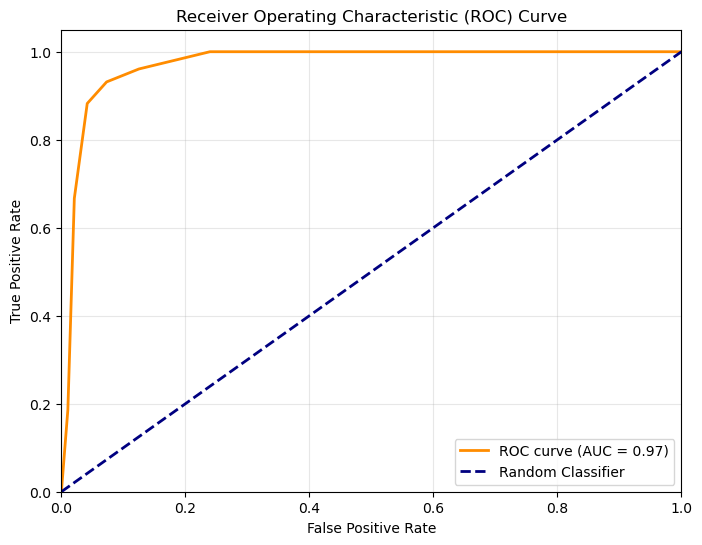

In [11]:
# ROC chart
import matplotlib.pyplot as plt

# Extract probabilities and labels
predictions_collected = predictions.select('target', 'probability').collect()

# Extract probability of positive class (class 1)
y_true = [row['target'] for row in predictions_collected]
y_score = [row['probability'][1] for row in predictions_collected]  # probability of class 1

# Compute ROC curve using sklearn
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Hyper parameterization

In [32]:
print(dtc.explainParams())

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 40, Finished, Available, Finished)

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featuresCol: features column name. (default: features, current: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)
labelCol: label column name. (default: label, current: target)
leafCol: Leaf indices column name. Predicted leaf index of each instance in each tree by preorder. (default: )
maxBins: Max number of bins for discret

In [33]:
from pyspark.ml.tuning import ParamGridBuilder

# Create parameter grid
paramGrid = (ParamGridBuilder()
    .addGrid(dtc.maxDepth, [3,4,5,6,7,8])
    .addGrid(dtc.minInfoGain, [0, 0.1, 0.2, 0.3])
    .build())

# This creates multiple parameter combinations
print(f"Number of parameter combinations: {len(paramGrid)}")

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 41, Finished, Available, Finished)

Number of parameter combinations: 24


In [34]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

tvs = TrainValidationSplit(estimator=mlpl,
                           estimatorParamMaps=paramGrid,
                           evaluator=BinaryClassificationEvaluator(labelCol='target'),
                           # 80% of the data will be used for training, 20% for validation.
                           trainRatio=0.8)

# Run TrainValidationSplit, and choose the best set of parameters.
ml_model = tvs.fit(train_df)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 42, Finished, Available, Finished)

In [35]:
# Create a results summary
results = []
for idx, (params, metric) in enumerate(zip(paramGrid, ml_model.validationMetrics)):
    result = {'model_id': idx, 'metric': metric}
    for param, value in params.items():
        result[param.name] = value
    results.append(result)

display(results)

StatementMeta(, 468a52a9-217e-4085-b281-89900eabba7e, 43, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f05d71f7-8374-4aff-9fcb-a8cd2dfbda65)

## Combining it all: Find injuries

In [1]:
df = spark.sql("SELECT * FROM Sporters.dbo.injury LIMIT 1000")
display(df)

StatementMeta(, 8c359c54-efea-490b-a61a-08d73ad1e0b0, 3, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, bb9ecd97-c0c2-4e22-8494-52cb9b85f08f)

In [18]:
# Prepare pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.pipeline import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

si = StringIndexer(inputCols=['Sex', 'Country'], outputCols=['Sex_si', 'Country_si'])
oh = OneHotEncoder(inputCols=['Country_si'], outputCols=['Country_oh'])
va = VectorAssembler(inputCols=['Sex_si','Country_oh','Age', 'BMI', 'bm1', 'bm2', 'bm3'], outputCol='features')
ss = StandardScaler(inputCol='features', outputCol='features_scaled')
rf = RandomForestClassifier(featuresCol='features_scaled',labelCol='label')
pl = Pipeline(stages=[si,oh,va,ss,rf])

ml_train, ml_test = mldf.randomSplit([0.8,0.2])
ml_model = pl.fit(ml_train)
ml_result = ml_model.transform(ml_test)

StatementMeta(, 8c359c54-efea-490b-a61a-08d73ad1e0b0, 20, Finished, Available, Finished)

In [20]:
ml_result.columns

StatementMeta(, 8c359c54-efea-490b-a61a-08d73ad1e0b0, 22, Finished, Available, Finished)

['Country',
 'Sex',
 'Age',
 'BMI',
 'bm1',
 'bm2',
 'bm3',
 'label',
 'Sex_si',
 'Country_si',
 'Country_oh',
 'features',
 'features_scaled',
 'rawPrediction',
 'probability',
 'prediction']

In [21]:
display(ml_result.select('label','prediction','probability'))

StatementMeta(, 8c359c54-efea-490b-a61a-08d73ad1e0b0, 23, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5e9fa9a8-74bf-444c-8705-a99c5ad18e89)